## Imports 

In [ ]:
import sys
sys.path.append("..")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
from src.data_loader import load_ravdess_data, load_audio_file, get_audio_info
from src.config import SAMPLE_RATE

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

## Load Dataset

In [ ]:
df = load_ravdess_data()
# print(df.head())
# print(f"\nDataset shape: {df.shape}")
# print(f"\nColumns: {df.columns.tolist()}")

Loaded 2880 audio files
                                           file_path  \
0  c:\Users\mnael\OneDrive\Documents\Nael\Code\Vi...   
1  c:\Users\mnael\OneDrive\Documents\Nael\Code\Vi...   
2  c:\Users\mnael\OneDrive\Documents\Nael\Code\Vi...   
3  c:\Users\mnael\OneDrive\Documents\Nael\Code\Vi...   
4  c:\Users\mnael\OneDrive\Documents\Nael\Code\Vi...   

                   filename  emotion emotion_code intensity statement  \
0  03-01-01-01-01-01-01.wav  neutral           01    normal        01   
1  03-01-01-01-01-02-01.wav  neutral           01    normal        01   
2  03-01-01-01-02-01-01.wav  neutral           01    normal        02   
3  03-01-01-01-02-02-01.wav  neutral           01    normal        02   
4  03-01-02-01-01-01-01.wav     calm           02    normal        01   

  repetition  actor gender  
0         01      1   male  
1         02      1   male  
2         01      1   male  
3         02      1   male  
4         01      1   male  


## Distributions

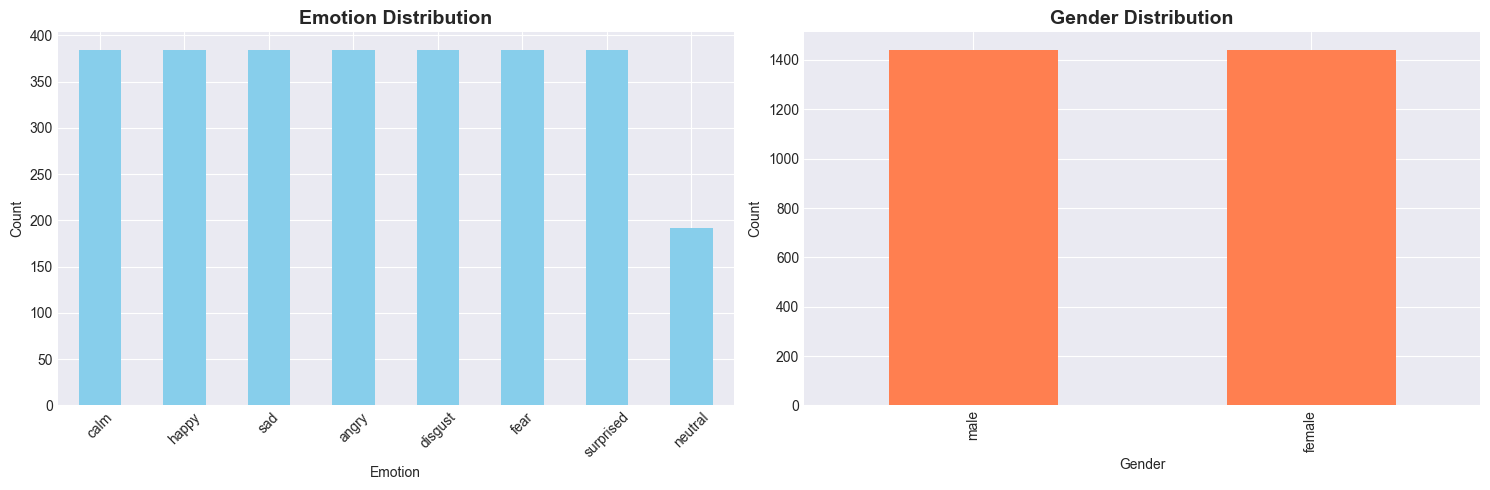

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Emotion counts
df["emotion"].value_counts().plot(kind="bar", ax=axes[0], color="skyblue")
axes[0].set_title("Emotion Distribution", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Emotion")
axes[0].set_ylabel("Count")
axes[0].tick_params(axis="x", rotation=45)

# Gender distribution
df["gender"].value_counts().plot(kind="bar", ax=axes[1], color="coral")
axes[1].set_title("Gender Distribution", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

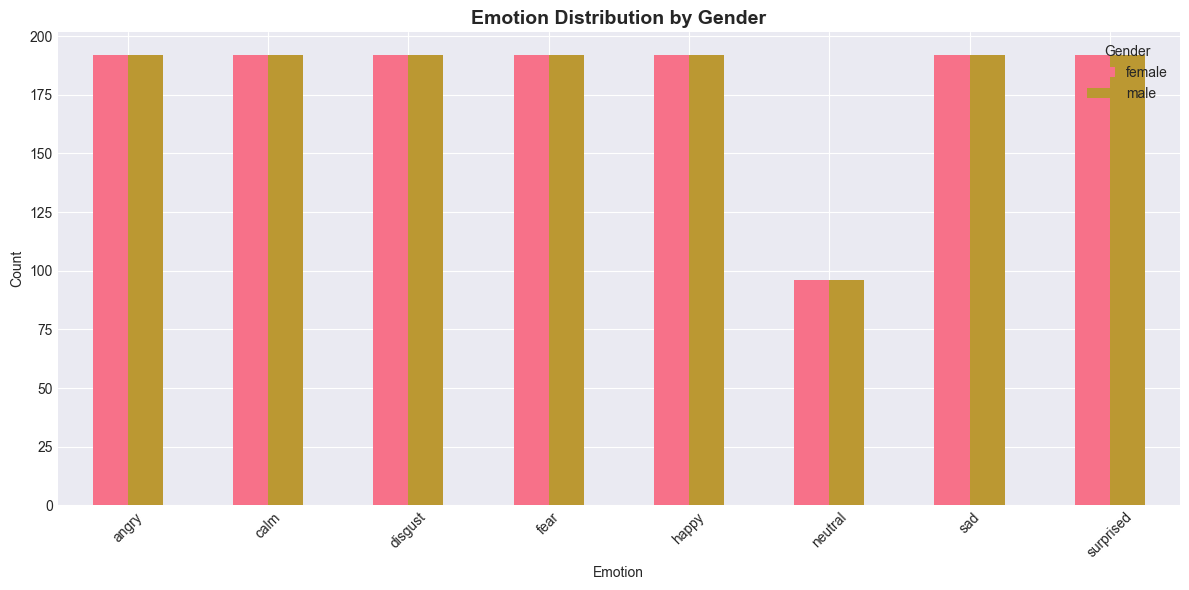

In [ ]:
# Emotion distribution by gender
pd.crosstab(df["emotion"], df["gender"]).plot(kind="bar", figsize=(12, 6))
plt.title("Emotion Distribution by Gender", fontsize=14, fontweight="bold")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Audio samples

In [ ]:
print("Sample audio files for each emotion:\n")

for emotion in df["emotion"].unique():
    sample = df[df["emotion"] == emotion].iloc[0]
    print(f"\n{emotion.upper()}: {sample["filename"]}")
    
    # Display audio player
    audio = load_audio_file(sample["file_path"])
    if audio is not None:
        ipd.display(ipd.Audio(audio, rate=SAMPLE_RATE))

Sample audio files for each emotion:


NEUTRAL: 03-01-01-01-01-01-01.wav



CALM: 03-01-02-01-01-01-01.wav



HAPPY: 03-01-03-01-01-01-01.wav



SAD: 03-01-04-01-01-01-01.wav



ANGRY: 03-01-05-01-01-01-01.wav



FEAR: 03-01-06-01-01-01-01.wav



DISGUST: 03-01-07-01-01-01-01.wav



SURPRISED: 03-01-08-01-01-01-01.wav


## Visualizations

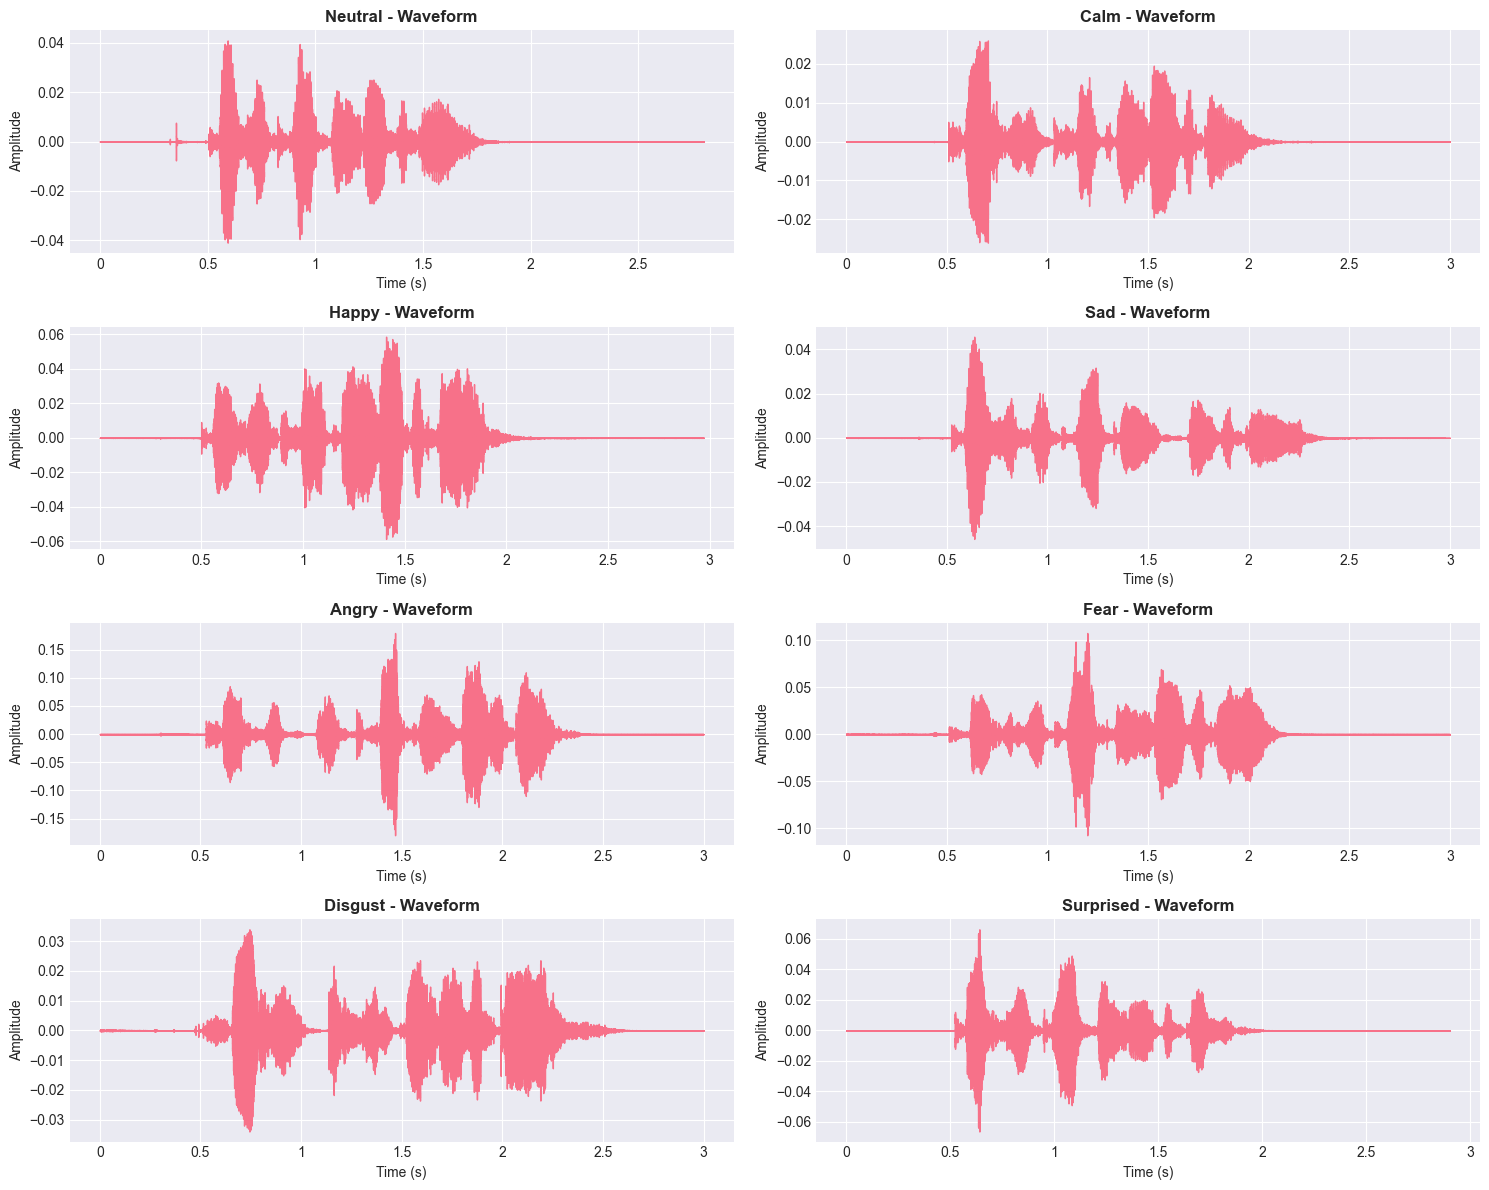

In [ ]:
# Waveforms for different emotions
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.ravel()

for i, emotion in enumerate(df["emotion"].unique()):
    sample = df[df["emotion"] == emotion].iloc[0]
    audio = load_audio_file(sample["file_path"])
    
    if audio is not None:
        librosa.display.waveshow(audio, sr=SAMPLE_RATE, ax=axes[i])
        axes[i].set_title(f"{emotion.capitalize()} - Waveform", fontweight="bold")
        axes[i].set_xlabel("Time (s)")
        axes[i].set_ylabel("Amplitude")

plt.tight_layout()
plt.show()

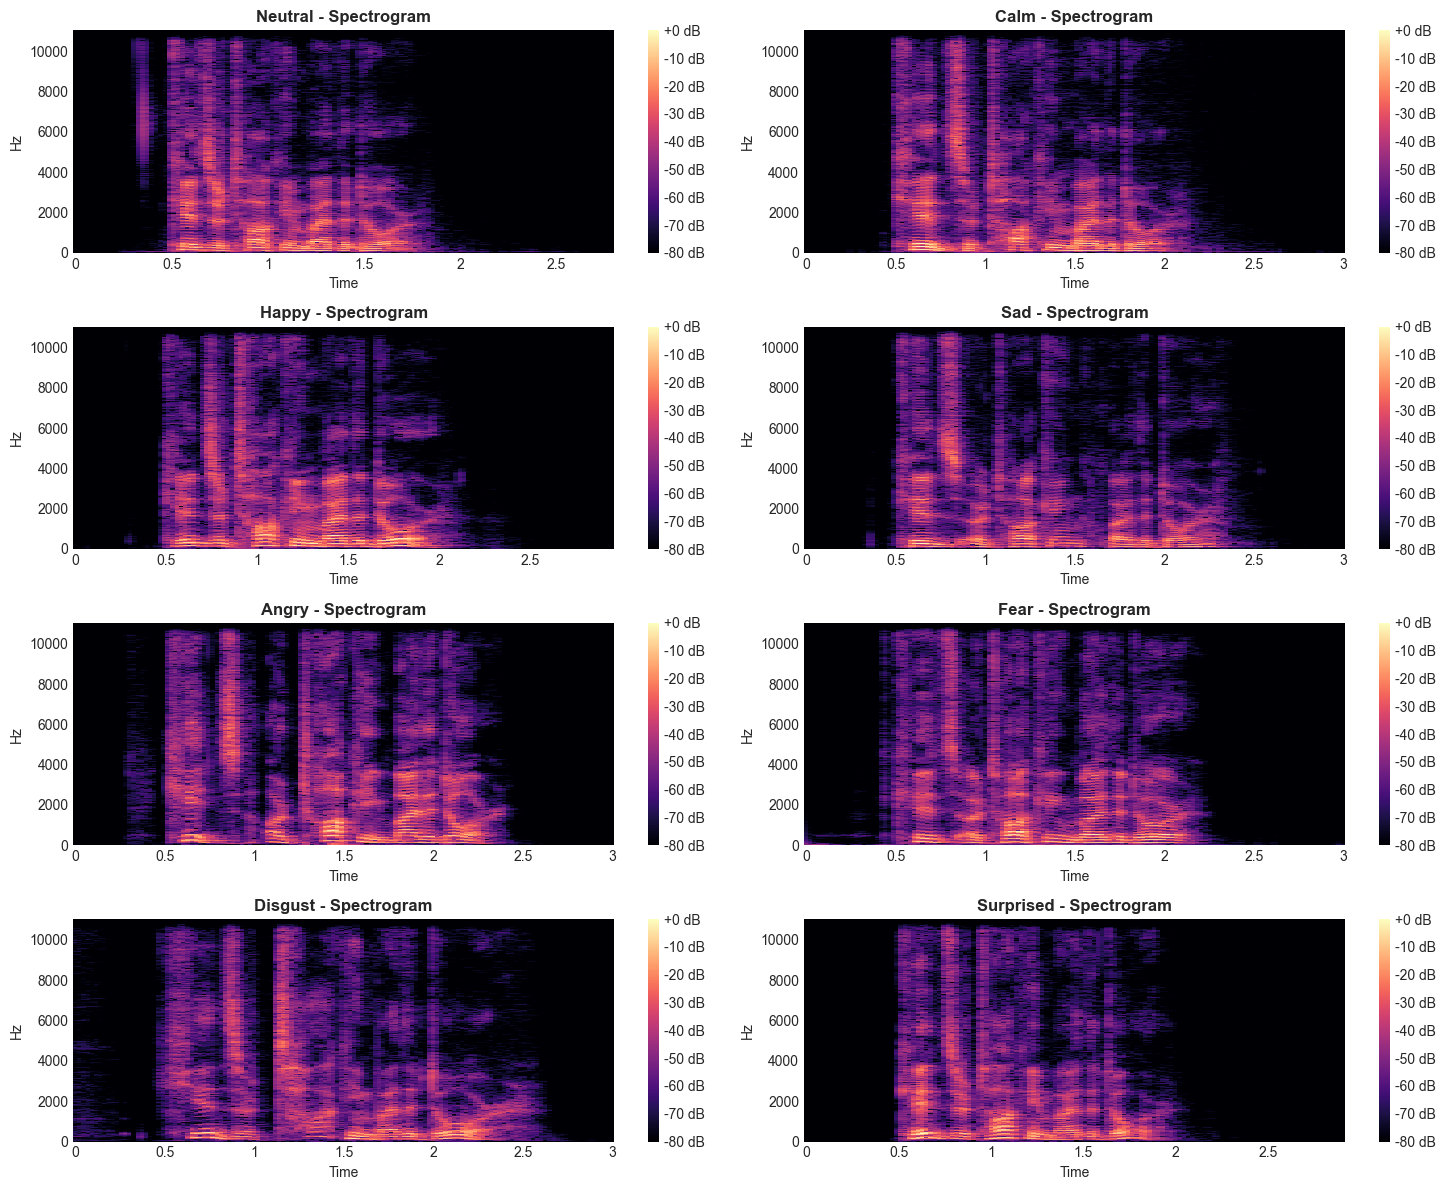

In [ ]:
# Spectograms for different emotions
fig, axes = plt.subplots(4, 2, figsize=(15, 12))
axes = axes.ravel()

for i, emotion in enumerate(df["emotion"].unique()):
    sample = df[df["emotion"] == emotion].iloc[0]
    audio = load_audio_file(sample["file_path"])
    
    if audio is not None:
        # Compute spectrogram
        D = librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max)
        img = librosa.display.specshow(D, sr=SAMPLE_RATE, x_axis="time", 
                                       y_axis="hz", ax=axes[i])
        axes[i].set_title(f"{emotion.capitalize()} - Spectrogram", fontweight="bold")
        fig.colorbar(img, ax=axes[i], format="%+2.0f dB")

plt.tight_layout()
plt.show()

## Statistics

In [ ]:
# Audio statistics
print("\nAudio File Statistics:")
sample_files = df.sample(5)

for i, row in sample_files.iterrows():
    info = get_audio_info(row["file_path"])
    print(f"\nFile: {row["filename"]}")
    print(f"Emotion: {row["emotion"]}")
    print(f"Duration: {info["duration"]:.2f} seconds")
    print(f"Sample Rate: {info["sample_rate"]} Hz")
    print(f"Samples: {info["samples"]}")


Audio File Statistics:

File: 03-01-03-02-01-01-13.wav
Emotion: happy
Duration: 3.44 seconds
Sample Rate: 48000 Hz
Samples: 164965

File: 03-01-06-01-02-02-11.wav
Emotion: fear
Duration: 3.20 seconds
Sample Rate: 48000 Hz
Samples: 153754

File: 03-01-01-01-01-01-09.wav
Emotion: neutral
Duration: 3.27 seconds
Sample Rate: 48000 Hz
Samples: 156957

File: 03-01-06-02-01-02-18.wav
Emotion: fear
Duration: 4.17 seconds
Sample Rate: 48000 Hz
Samples: 200200

File: 03-01-08-02-02-01-01.wav
Emotion: surprised
Duration: 3.50 seconds
Sample Rate: 48000 Hz
Samples: 168168
